In [52]:
# The following lines should check the multi shell data in the SFB istanbul sequence and compare to the original DTI sequence
# Most of the used sequences are copied from the dipy tutorial.
# Balint Kincses
# Balint.Kincses@uk-essen.de
# 2020

from os.path import join
import numpy as np

from dipy.io.image import load_nifti
from dipy.io import read_bvals_bvecs
from dipy.core.gradients import gradient_table
from dipy.io.image import save_nifti
import dipy.reconst.dki as dki
import dipy.reconst.dti as dti
from dipy.segment.mask import median_otsu
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt

import nipype.interfaces.fsl as fsl

outputdir='/home/analyser/Documents/Balint/projects/probe/data_out/'
# define inputs of the data /if you run the script it starts from its folder, absolute path should be usable
fdwi='/home/analyser/Documents/Balint/projects/probe/data_in/DTI_istanbul/eddycorr_dti_ist.nii.gz'
bvals='/home/analyser/Documents/Balint/projects/probe/data_in/DTI_istanbul/_M2557189_ep2d_dti_istanbul_v1_20200910165429_13.bval'
bvecs='/home/analyser/Documents/Balint/projects/probe/data_in/DTI_istanbul/_M2557189_ep2d_dti_istanbul_v1_20200910165429_13.bvec'


In [2]:
# read diffusion imgs
data, affine, img = load_nifti(fdwi,return_img=True)

# get data resolution and volume size
print('The size of the imgs')
print(data.shape)
print('Resolution:')
print(img.header.get_zooms()[:3])


The size of the imgs
(132, 112, 76, 133)
Resolution:
(1.59848, 1.59848, 1.6)


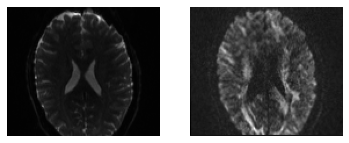

<Figure size 432x288 with 0 Axes>

In [3]:
# visualize slices from a certain volume
axial_middle = data.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(data[:, :, axial_middle, 10].T, cmap='gray', origin='lower')
plt.show()
plt.savefig('data.png', bbox_inches='tight')

In [4]:
# read bvals and bvecs files
bvals, bvecs = read_bvals_bvecs(bvals, bvecs)
# creat gradient table, which contains all the information about diffusion gradients
gtab = gradient_table(bvals, bvecs)
print('bvals:')
print(gtab.bvals)
#
print('bvecs:')
print(gtab.bvecs)
# take imgs with zero weightening
S0s = data[:, :, :, gtab.b0s_mask]
# print('S0s indices',gtab.b0s_mask)

bvals:
[   0. 2500. 2500. 1000. 1800. 1800. 2500. 1800. 1800. 1000. 2500. 1000.
 1000. 2500. 2500. 1000. 1000.    0. 1800. 2500. 2500. 2500. 1800. 2500.
 2500. 2500.    0. 1000. 1800. 1800. 2500. 1000. 1800. 1000. 2500.    0.
 2500. 2500. 1000. 1800. 2500. 2500. 2500. 1800. 2500. 1800. 1000. 1800.
 2500. 1000. 1000. 1800.    0.    0. 2500. 2500. 2500. 2500. 1800. 1800.
 2500. 1800. 2500. 1800. 1800. 1800. 2500. 1800. 2500. 1000.    0. 1800.
 2500. 2500. 1800. 2500. 2500. 1800.    0. 2500. 1000. 1000. 1800. 2500.
 2500. 1800. 2500. 2500.    0. 1800. 2500. 2500. 2500. 2500. 1000. 1800.
 2500. 2500. 2500. 2500. 2500. 1800. 1800. 1800.    0. 1800.    0. 2500.
 1800. 2500. 1800. 1800. 2500. 1800. 2500. 2500. 2500. 2500. 1000. 2500.
 2500. 1800. 1000.    0. 1000. 2500. 2500. 2500. 1800. 2500. 1800. 1800.
    0.]
bvecs:
[[ 0.          0.          0.        ]
 [-0.0273275   0.82358    -0.566541  ]
 [-0.431304    0.270165   -0.860806  ]
 [-0.734944   -0.411657   -0.538883  ]
 [-0.374484    0.02

In [81]:
save_nifti(join(outputdir,'istanbul_dti_S0.nii.gz'), S0s, affine)
# np.where(gtab.b0s_mask)[0]
# maskdata, mask = median_otsu(data, vol_idx=[0], median_radius=4, numpass=4,
#                              autocrop=False, dilate=1) # do the bet

b0='/home/analyser/Documents/Balint/projects/probe/data_in/DTI_istanbul/brain_anat.nii.gz'
b0mask='/home/analyser/Documents/Balint/projects/probe/data_in/DTI_istanbul/brain_anat_mask.nii.gz'
maskdata, affinb0=load_nifti(b0)
mask, affinb0=load_nifti(b0mask)
# btr = fsl.BET()
# btr.inputs.in_file = fdwi
# btr.inputs.frac = 0.2
# btr.inputs.out_file = 'brain_anat.nii'
# res = btr.run() # doctest: +SKIP


In [73]:

print(type(res))
print(type(maskdata))
print(type(data))

<class 'nipype.interfaces.base.support.InterfaceResult'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [75]:
print(maskdata.shape)
print(axial_slice)

(132, 112, 76)
25


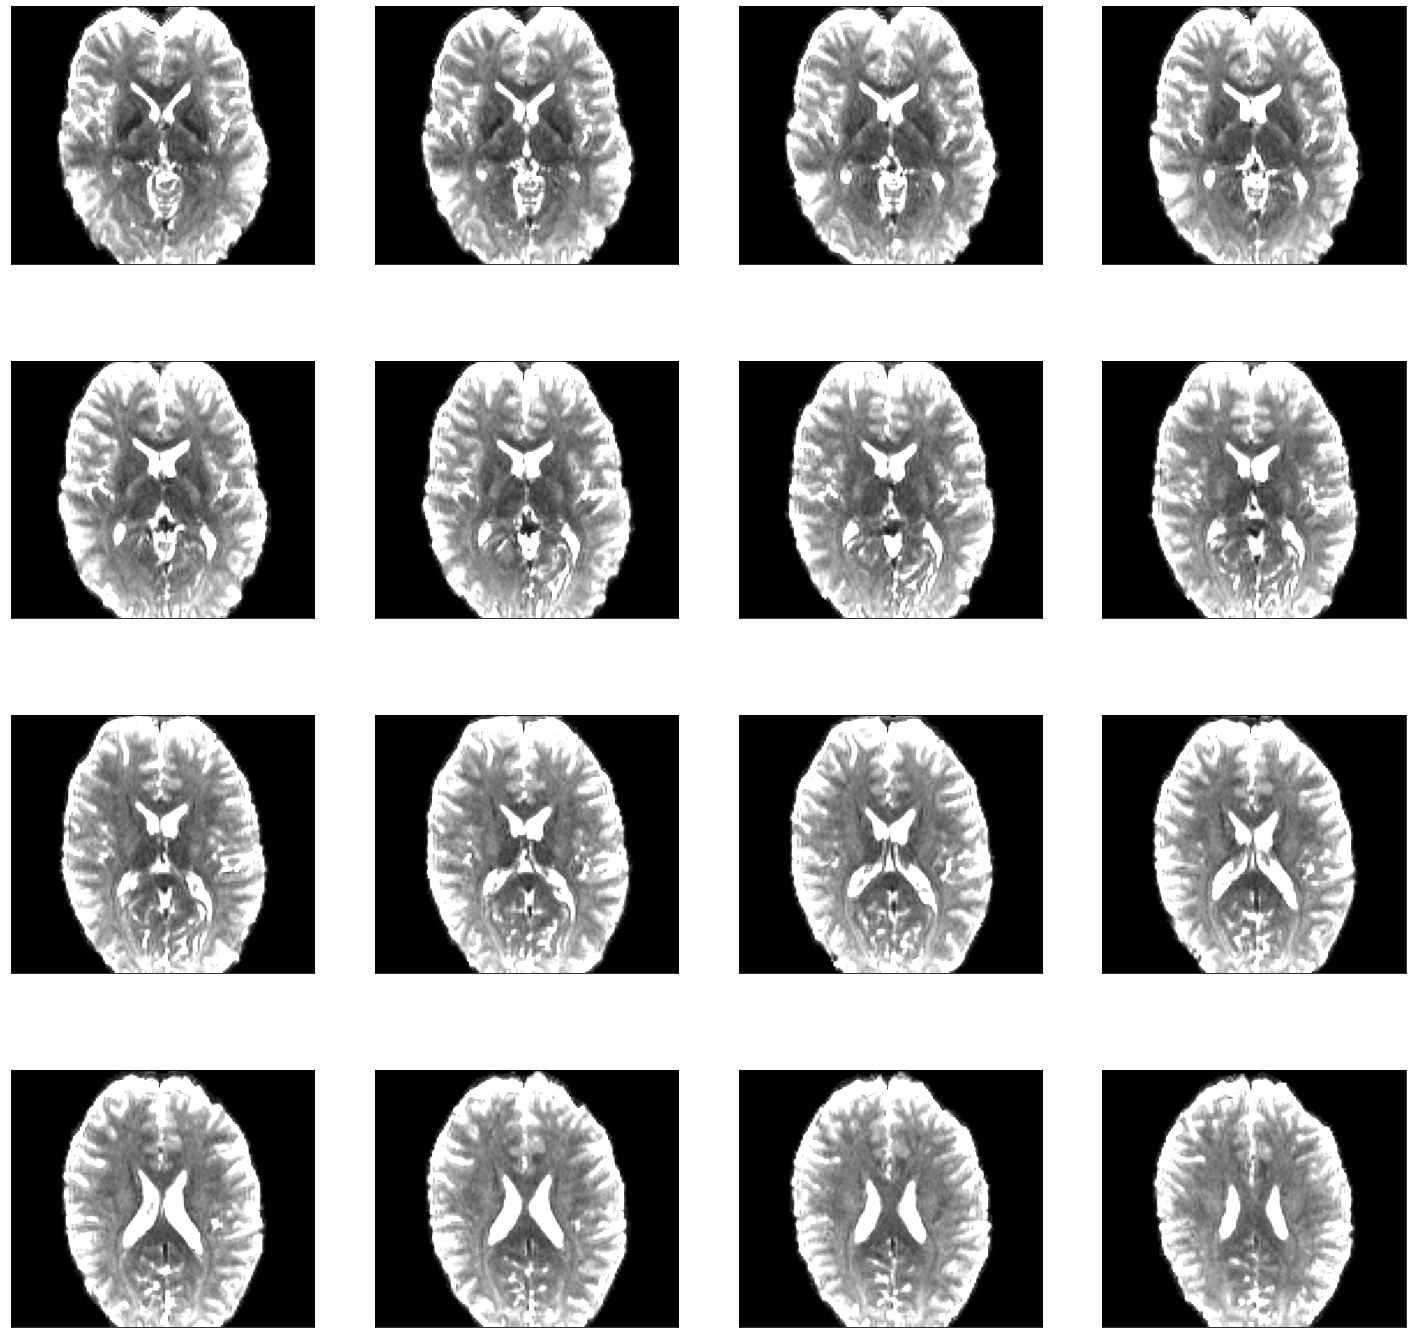

In [77]:
fig1, ax = plt.subplots(4, 4, figsize=(25, 25),
                        subplot_kw={'xticks': [], 'yticks': []})
for x in range(0,16):
    ax.flat[x].imshow(maskdata[ :,:,25+x].T, cmap='gray',
                  vmax=300, origin='lower')
plt.show()

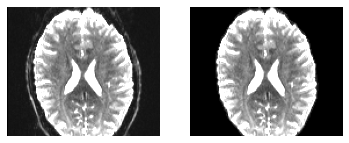

In [80]:
plt.figure('Showing the mask') # check the bet function in dipy
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', vmax=300, origin='lower')
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(maskdata[:, :, axial_middle].T, cmap='gray', vmax=300, origin='lower')
plt.show()


In [82]:

fwhm = 1.25
gauss_std = fwhm / np.sqrt(8 * np.log(2))  # converting fwhm to Gaussian std
data_smooth = np.zeros(data.shape)
for v in range(data.shape[-1]):
    data_smooth[..., v] = gaussian_filter(data[..., v], sigma=gauss_std)

# instantiate DKI model
dkimodel = dki.DiffusionKurtosisModel(gtab)

dkifit = dkimodel.fit(data_smooth, mask=mask)

In [83]:
print(dkifit.shape)
FA = dkifit.fa
MD = dkifit.md
AD = dkifit.ad
RD = dkifit.rd

(132, 112, 76)


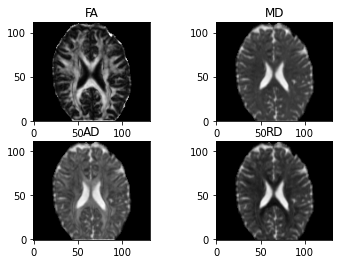

In [84]:
plt.figure()
plt.subplot(2,2,1).set_title('FA')
plt.imshow(FA[:,:,axial_middle].T, cmap='gray', origin='lower')
plt.subplot(2,2,2).set_title('MD')
plt.imshow(MD[:,:,axial_middle].T, cmap='gray', origin='lower')
plt.subplot(2,2,3).set_title('AD')
plt.imshow(AD[:,:,axial_middle].T, cmap='gray', origin='lower')
plt.subplot(2,2,4).set_title('RD')
plt.imshow(RD[:,:,axial_middle].T, cmap='gray', origin='lower')
plt.show()


In [85]:
tenmodel = dti.TensorModel(gtab)
tenfit = tenmodel.fit(data_smooth, mask=mask)

dti_FA = tenfit.fa
dti_MD = tenfit.md
dti_AD = tenfit.ad
dti_RD = tenfit.rd

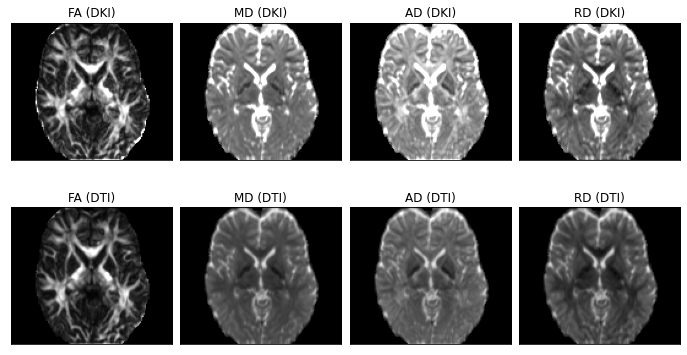

In [87]:
axial_slice = 25

fig1, ax = plt.subplots(2, 4, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig1.subplots_adjust(hspace=0.3, wspace=0.05)

ax.flat[0].imshow(FA[:, :, axial_slice].T, cmap='gray',
                  vmin=0, vmax=0.7, origin='lower')
ax.flat[0].set_title('FA (DKI)')
ax.flat[1].imshow(MD[:, :, axial_slice].T, cmap='gray',
                  vmin=0, vmax=2.0e-3, origin='lower')
ax.flat[1].set_title('MD (DKI)')
ax.flat[2].imshow(AD[:, :, axial_slice].T, cmap='gray',
                  vmin=0, vmax=2.0e-3, origin='lower')
ax.flat[2].set_title('AD (DKI)')
ax.flat[3].imshow(RD[:, :, axial_slice].T, cmap='gray',
                  vmin=0, vmax=2.0e-3, origin='lower')
ax.flat[3].set_title('RD (DKI)')

ax.flat[4].imshow(dti_FA[:, :, axial_slice].T, cmap='gray',
                  vmin=0, vmax=0.7, origin='lower')
ax.flat[4].set_title('FA (DTI)')
ax.flat[5].imshow(dti_MD[:, :, axial_slice].T, cmap='gray',
                  vmin=0, vmax=2.0e-3, origin='lower')
ax.flat[5].set_title('MD (DTI)')
ax.flat[6].imshow(dti_AD[:, :, axial_slice].T, cmap='gray',
                  vmin=0, vmax=2.0e-3, origin='lower')
ax.flat[6].set_title('AD (DTI)')
ax.flat[7].imshow(dti_RD[:, :, axial_slice].T, cmap='gray',
                  vmin=0, vmax=2.0e-3, origin='lower')
ax.flat[7].set_title('RD (DTI)')

plt.show()
fig1.savefig('Diffusion_tensor_measures_from_DTI_and_DKI.png')